In [26]:
import sys
import jmespath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

import fiostats

print(fiostats)
plt.style.use('ggplot')

<module 'fiostats' from '/reg/neh/home4/wilko/projects/psdm-tests/drpdev/fiostats.py'>


In [27]:
data_sng_ost = fiostats.read_test_sequence("single_writer/20190427T122307")
data_mny_ost = fiostats.read_test_sequence("single_writer/20190427T143113")
dall = data_sng_ost + data_mny_ost

Found for single_writer/20190427T122307 32 tests
Found for single_writer/20190427T143113 13 tests


In [28]:
dirs = jmespath.search('[*].jobs[*]."job options".directory', dall)
bw = jmespath.search('[*].jobs[*].write.bw_mean', dall)

res = []
for dirlst, bwlst in zip(dirs, bw):
    nosts = len(set(dirlst))
    nprocs = len(bwlst)
    meanbw = sum(bwlst) / 1024. 
    res.append([nosts, nprocs, meanbw])

df = pd.DataFrame(data=res, columns=["nost", "np", "bw"])
grp = df.groupby('nost')

# Single client node with many processes and different numbers of OSTs

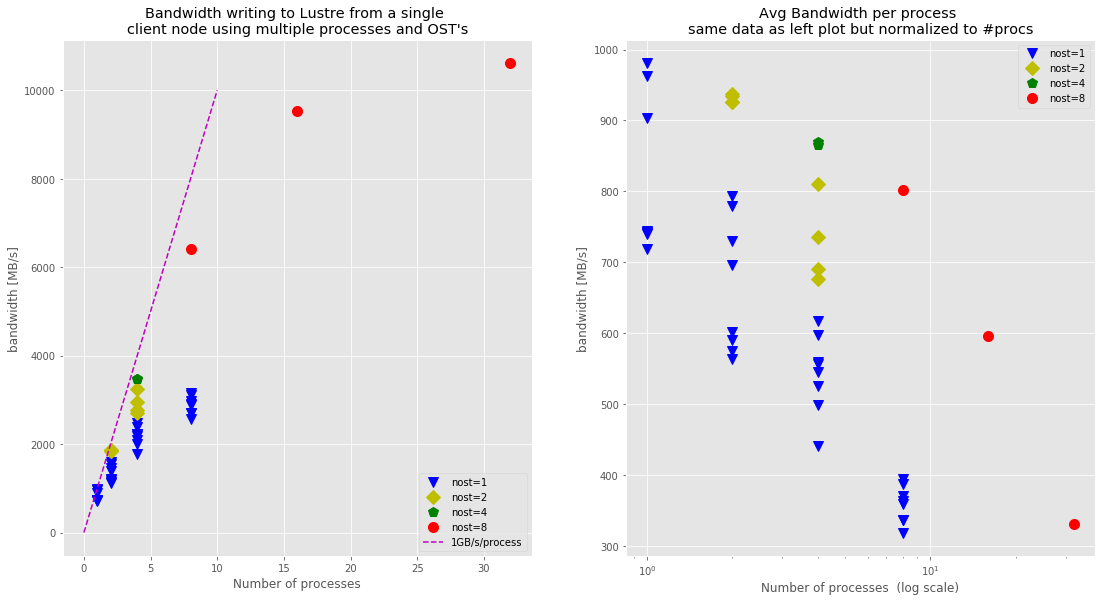

In [34]:
#print(jmespath.search('[*].time', data_sng_ost))
#print(jmespath.search('[*].jobs[*]."job options".directory', data_sng_ost))


symbol = { 1: "bv", 2: "yD", 4: "gp", 8: "ro"}
#fig = plt.figure(figsize=(25,10))
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 9.5)

for name, group in grp:
    x = group.iloc[:,1].values
    y = group.iloc[:,2].values
    y1 = group.iloc[:,2].values / group.iloc[:,1].values
    ax1.plot(x,y, symbol[name], label="nost={}".format(name), markersize=10)
    ax2.plot(x,y1, symbol[name], label="nost={}".format(name), markersize=10)

ax1.plot([0, 10], [0, 10000], 'm--', label="1GB/s/process")
ax1.set_title("Bandwidth writing to Lustre from a single \nclient node using multiple processes and OST's")
ax2.set_title("Avg Bandwidth per process \nsame data as left plot but normalized to #procs")

plt.grid(True)
ax1.set_xlabel("Number of processes")
ax1.set_ylabel("bandwidth [MB/s]")
ax1.legend(loc='lower right')

ax2.set_xlabel("Number of processes  (log scale)")
ax2.set_ylabel("bandwidth [MB/s]")
ax2.legend(loc='upper right')
ax2.set_xscale('log')

plt.savefig("pics/single_node_wbw.png")
plt.show()

# Variation of a single process writing to different OSTs

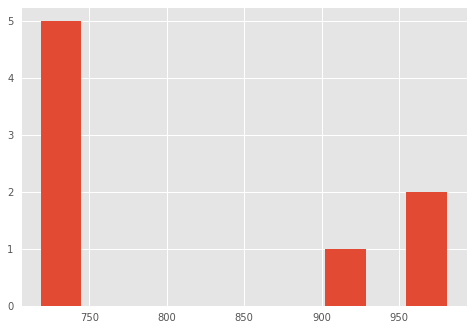

In [80]:
a = grp.get_group(1)
a.loc[a.np==1].bw.hist()